In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Simulación estocástica primitiva

In [2]:
#Constantes
r0=0
p0=0
kr=1
gr= 1/5
kp=30
gp= 1/30

In [3]:
it= 1000
t= np.zeros(it+1)
r= np.zeros(it+1)
p= np.zeros(it+1)
r[0]=r0
p[0]=p0
t[0]=0

In [4]:
#Creación o destrucción
dt= 0.01 #Intervalos de tiempo constantes
for i in range(it):
    if np.random.uniform() < kr*dt:
        r[i+1]= r[i]+1
    if np.random.uniform() < kp*dt:
        p[i+1] = p[i] + 1
    if np.random.uniform() < gr*dt:
        r[i+1]= r[i]-1
    if np.random.uniform() < gp*dt:
        p[i+1]= p[i]-1
    t[i+1] = t[i] + dt

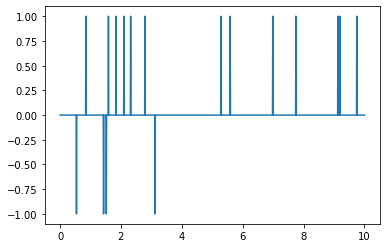

In [5]:
plt.plot(t,r)

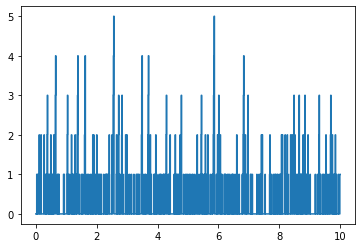

In [6]:
plt.step(t,p)

### Muestra 500 células

In [7]:
it = 1000
cell= 500
cells_r= np.zeros((cell, it+1))
cells_p= np.zeros((cell, it+1))
cells_t= np.zeros((cell, it+1))
def simulacion_prim():
    t= np.zeros(it+1)
    r= np.zeros(it+1)
    p= np.zeros(it+1)
    r[0]=r0
    p[0]=p0
    t[0]=0
    for i in range(it):
        if np.random.uniform() < kr*dt:
            r[i+1]= r[i]+1
        if np.random.uniform() < kp*dt:
            p[i+1] = p[i] + 1
        if np.random.uniform() < gr*dt:
            r[i+1]= r[i]-1
        if np.random.uniform() < gp*dt:
            p[i+1]= p[i]-1
        t[i+1] = t[i] + dt
    return (r,p,t)
for i in range(cell):
    r,p,t= simulacion_prim()
    cells_r[i]= r
    cells_p[i]= p
    cells_t[i]= t

In [8]:
promedior= np.zeros(it)
promediop= np.zeros(it)
promediot= np.zeros(it)
for i in range(it):
    promedior[i]= np.mean(cells_r[:,i])
    promediop[i]= np.mean(cells_p[:,i])
    promediot[i]= np.mean(cells_t[:,i])

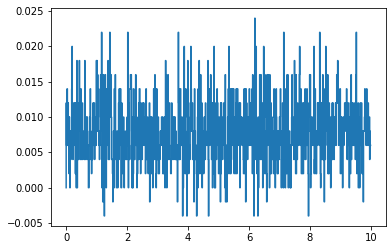

In [9]:
plt.step(promediot, promedior)

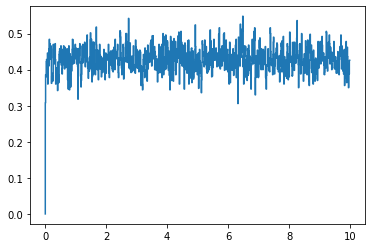

In [10]:
plt.step(promediot, promediop)

In [11]:
#Ruido y promedio para r y p, respectivamente.
print( np.mean(promedior), np.var(promedior), np.mean(promediop), np.var(promediop))

0.007714 2.2322204e-05 0.427712 0.001400821056


Podemos ver que este método funciona bien para un dt pequeño, en nuestro caso de 0.01. En tiempos mayores a 0.1 el algoritmo empieza a arrojar resultados poco precisos.

In [12]:
import time

In [13]:
it= 300 #10/gr
dt= 0.01
cell= 100
cells_r= np.zeros((cell, it+1))
cells_p= np.zeros((cell, it+1))
start= time.time()
for i in range(cell):
    cells_r[i]= simulacion_prim()[0]
    cells_p[i]= simulacion_prim()[1]
end= time.time()

In [14]:
#Tiempo de simulación para 100 células en 10/gr unidades de tiempo.
print(end-start)

0.7360069751739502


### Con retroalimentación negativa

In [15]:
it = 1000
cell= 500
cells_r= np.zeros((cell, it+1))
cells_p= np.zeros((cell, it+1))
def simulacion_prim_neg():
    t= np.zeros(it+1)
    r= np.zeros(it+1)
    p= np.zeros(it+1)
    r[0]=r0
    p[0]=p0
    t[0]=0
    for i in range(it):
        if np.random.uniform() < kr/(1+(p[0]/(kr/kp))**2)*dt:
            r[i+1]= r[i]+1
        if np.random.uniform() < kp*dt:
            p[i+1] = p[i] + 1
        if np.random.uniform() < gr*dt:
            r[i+1]= r[i]-1
        if np.random.uniform() < gp*dt:
            p[i+1]= p[i]-1
        t[i+1] = t[i] + dt
    return (r,p,t)
for i in range(cell):
    r,p,t= simulacion_prim_neg()
    cells_r[i]= r
    cells_p[i]= p
    cells_t[i]= t

In [16]:
promedior= np.zeros(it)
promediop= np.zeros(it)
promediot= np.zeros(it)
for i in range(it):
    promedior[i]= np.mean(cells_r[:,i])
    promediop[i]= np.mean(cells_p[:,i])
    promediot[i]= np.mean(cells_t[:,i])

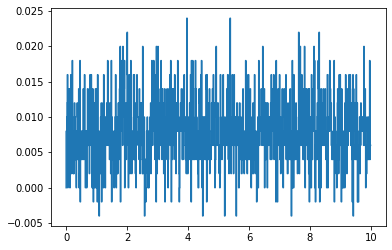

In [17]:
plt.step(promediot, promedior)

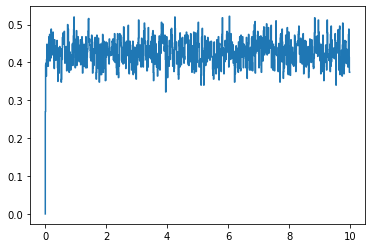

In [18]:
plt.step(promediot, promediop)

## Fundamentos del algoritmo de Gillespie

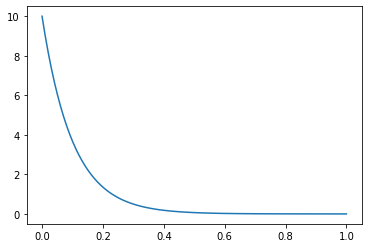

In [19]:
r= 10
x= np.linspace(0, 1, 100)
y = lambda x: r*np.exp(-r*x)
plt.plot(x,y(x))

(array([232., 120.,  67.,  35.,  24.,  14.,   3.,   4.,   0.,   1.]),
 array([1.94831877e-04, 5.97806164e-02, 1.19366401e-01, 1.78952186e-01,
        2.38537970e-01, 2.98123755e-01, 3.57709539e-01, 4.17295324e-01,
        4.76881108e-01, 5.36466893e-01, 5.96052677e-01]),
 <a list of 10 Patch objects>)

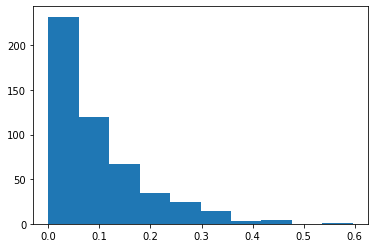

In [20]:
a=np.zeros(500)
for i in range(500):
    u= np.random.uniform()
    a[i]= (-1/r)*np.log(u)
plt.hist(a)

In [21]:
r1=np.zeros(1000)
for i in range(1000):
    u= np.random.uniform()
    r1[i]= (1/10)*np.log(1/u)

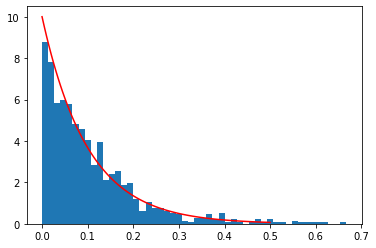

In [22]:
r=10 #Media
plt.hist(r1, bins=50, density=True)
x=np.linspace(0,0.5,100)
y= lambda x: r*np.exp(-r*x)
plt.plot(x, y(x), c="r")

In [23]:
r2=np.zeros(1000)
for i in range(1000):
    u= np.random.uniform()
    r2[i]= (1/5)*np.log(1/u)

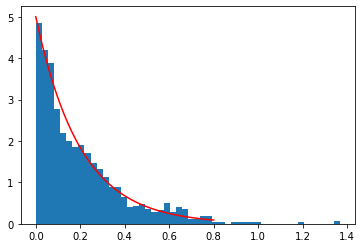

In [24]:
r=5 #Media
plt.hist(r2, bins=50, density= True)
x=np.linspace(0,0.8,100)
y= lambda x: r*np.exp(-r*x)
plt.plot(x, y(x), c="r")

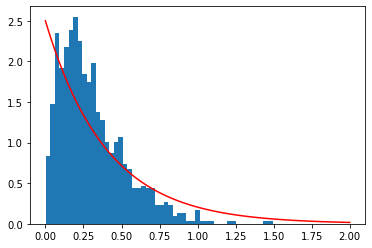

In [25]:
r=2.5 #Media
plt.hist((r1+r2), bins=50, density= True)
x=np.linspace(0,2,100)
y= lambda x: r*np.exp(-r*x)
plt.plot(x, y(x), c="r")

In [26]:
r1=np.zeros(500)
r2=np.zeros(500)
for i in range(500):
    u= np.random.uniform()
    r1[i]= (1/15)*np.log(1/u)
    v = np.random.uniform()
    if v < 1/3:
        r1[i]= 0
        r2[i]= (1/15)*np.log(1/u)

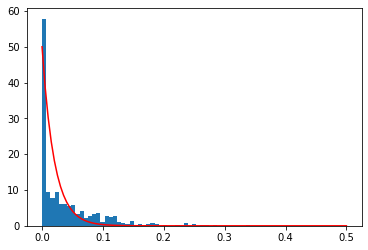

In [27]:
r= 50 #Media
plt.hist(r1, bins=50, density=True)
x=np.linspace(0 ,0.5,100)
y= lambda x: r*np.exp(-r*x)
plt.plot(x, y(x), c="r")

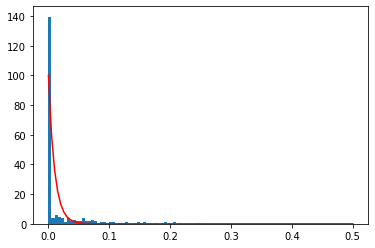

In [28]:
r= 100 #Media
plt.hist(r2, bins=50, density=True)
x=np.linspace(0,0.5,100)
y= lambda x: r*np.exp(-r*x)
plt.plot(x, y(x), c="r")

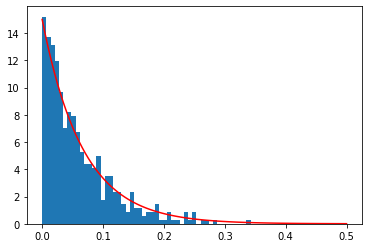

In [29]:
r= 15 #Media
plt.hist((r1+r2), density=True, bins=50)
x=np.linspace(0,0.5,100)
y= lambda x: r*np.exp(-r*x)
plt.plot(x, y(x), c="r")

## Simulación estocástica con algoritmo de Gillespie

In [30]:
it=10000
cell= 1000
cells_r= np.zeros((cell, it+1))
cells_p= np.zeros((cell, it+1))
cells_t= np.zeros((cell, it+1))
def gillespie():
    t= np.zeros(it+1)
    r= np.zeros(it+1)
    p= np.zeros(it+1)
    r[0]=r0
    p[0]=p0
    t[0]=0
    for i in range(it):
        s1= kr
        s2 = gr*r[i]
        s3= kp*r[i]
        s4= gp*p[i]
        st= s1+s2+s3+s4
        t[i+1]= t[i] + (-1/st) * np.log(np.random.uniform())
        m= np.random.uniform()
        if m <= (s1/st):
            r[i+1]= r[i] + 1
            p[i+1]= p[i] 
        elif m <= (s1+s2)/st:
            r[i+1]= r[i] - 1
            p[i+1]= p[i] 
        elif m <= (s1+s2+s3)/st:
            r[i+1]= r[i]
            p[i+1]= p[i] +1
        else:
            r[i+1]= r[i] 
            p[i+1]= p[i] - 1
    return (r,p,t)
for i in range(cell):
    r,p,t= gillespie()
    cells_r[i]= r
    cells_p[i]= p
    cells_t[i]= t

In [31]:
promedior= np.zeros(it)
promediop= np.zeros(it)
promediot= np.zeros(it)
for i in range(it):
    promedior[i]= np.mean(cells_r[:,i])
    promediop[i]= np.mean(cells_p[:,i])
    promediot[i]= np.mean(cells_t[:,i])

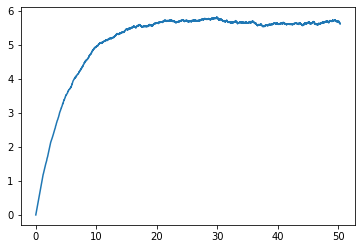

In [32]:
plt.plot(promediot,promedior)

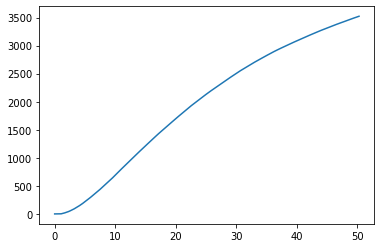

In [33]:
plt.plot(promediot, promediop)

In [34]:
#Ruido y promedio para r y p, respectivamente.
print( np.mean(promedior), np.var(promedior), np.mean(promediop), np.var(promediop))

5.4632054 0.33990097221084004 2296.2468704000003 925500.1454643615


In [35]:
it= 300 #10/gr
dt= 0.01
cell= 100
cells_r= np.zeros((cell, it+1))
cells_p= np.zeros((cell, it+1))
start= time.time()
for i in range(cell):
    r,p,t= gillespie()
end= time.time()

In [36]:
#Tiempo de simulación para 100 células en 10/gr unidades de tiempo.
print(end-start)

0.38939428329467773


## Retroalimentación

In [37]:
it=10000
cell= 1000
cells_r= np.zeros((cell, it+1))
cells_p= np.zeros((cell, it+1))
cells_t= np.zeros((cell, it+1))
def gillespie_neg():
    t= np.zeros(it+1)
    r= np.zeros(it+1)
    p= np.zeros(it+1)
    r[0]=r0
    p[0]=p0
    t[0]=0
    for i in range(it):
        s1= kr/(1+(p[i]/(kr/kp))**2)
        s2 = gr*r[i]
        s3= kp*r[i]
        s4= gp*p[i]
        st= s1+s2+s3+s4
        t[i+1]= t[i] + (-1/st) * np.log(np.random.uniform())
        m= np.random.uniform()
        if m <= (s1/st):
            r[i+1]= r[i] + 1
            p[i+1]= p[i] 
        elif m <= (s1+s2)/st:
            r[i+1]= r[i] - 1
            p[i+1]= p[i] 
        elif m <= (s1+s2+s3)/st:
            r[i+1]= r[i]
            p[i+1]= p[i] +1
        else:
            r[i+1]= r[i] 
            p[i+1]= p[i] - 1
    return (r,p,t)
for i in range(cell):
    r,p,t= gillespie_neg()
    cells_r[i]= r
    cells_p[i]= p
    cells_t[i]= t

In [38]:
promedior= np.zeros(it)
promediop= np.zeros(it)
promediot= np.zeros(it)
for i in range(it):
    promedior[i]= np.mean(cells_r[:,i])
    promediop[i]= np.mean(cells_p[:,i])
    promediot[i]= np.mean(cells_t[:,i])

In [39]:
print(promediot, t,dt)

[0.00000000e+00 1.02339930e+00 1.05532404e+00 ... 4.92772259e+03
 4.92827611e+03 4.92868636e+03] [0.00000000e+00 9.22492845e-01 9.42134413e-01 ... 5.73665767e+03
 5.73667048e+03 5.73675594e+03] 0.01


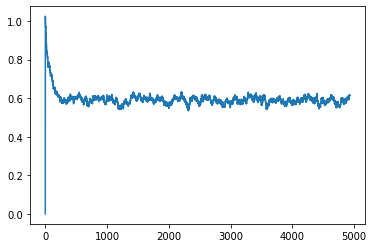

In [40]:
plt.step(promediot,promedior)

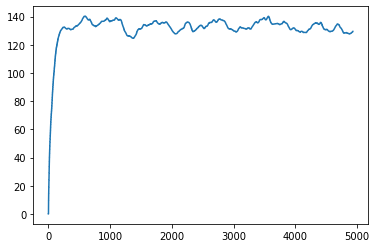

In [41]:
plt.step(promediot, promediop)

Cuando hay retroalimentación positiva, la proteína tarda menos mucho menos tiempo en estabilizarse. La diferencia es 1/5, es decir, el valor de gr.

In [42]:
#Ruido y promedio para r y p, respectivamente.
print( np.mean(promedior), np.var(promedior), np.mean(promediop), np.var(promediop))

0.5961728999999999 0.0016707480055900004 131.6127513 135.3013505930483


In [43]:
it=10000
cell= 1000
cells_r= np.zeros((cell, it+1))
cells_p= np.zeros((cell, it+1))
cells_t= np.zeros((cell, it+1))
def gillespie_pos():
    t= np.zeros(it+1)
    r= np.zeros(it+1)
    p= np.zeros(it+1)
    r[0]=r0
    p[0]=p0
    t[0]=0
    for i in range(it):
        s1= kr/(1+(p[i]/(kr/kp)**-2))
        s2 = gr*r[i]
        s3= kp*r[i]
        s4= gp*p[i]
        st= s1+s2+s3+s4
        t[i+1]= t[i+1]= t[i] + (-1/st) * np.log(np.random.uniform())
        m= np.random.uniform()
        if m <= (s1/st):
            r[i+1]= r[i] + 1
            p[i+1]= p[i] 
        elif m <= (s1+s2)/st:
            r[i+1]= r[i] - 1
            p[i+1]= p[i] 
        elif m <= (s1+s2+s3)/st:
            r[i+1]= r[i]
            p[i+1]= p[i] +1
        else:
            r[i+1]= r[i] 
            p[i+1]= p[i] - 1
    return (r,p,t)
for i in range(cell):
    r,p,t= gillespie_pos()
    cells_r[i]= r
    cells_p[i]= p
    cells_t[i]= t

In [44]:
promedior= np.zeros(it)
promediop= np.zeros(it)
promediot= np.zeros(it)
for i in range(it):
    promedior[i]= np.mean(cells_r[:,i])
    promediop[i]= np.mean(cells_p[:,i])
    promediot[i]= np.mean(cells_t[:,i])

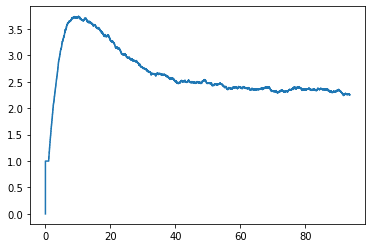

In [45]:
plt.step(promediot,promedior)

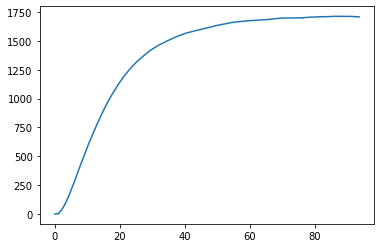

In [46]:
plt.step(promediot, promediop)

## Aproximación por escalas temporales

In [47]:
p=np.zeros(10001)
t=np.zeros(10001)
p[0]=p0
t[0]=0
b= kp/gr

In [48]:
for i in range(10000):
    s1= kp
    s2 = gp*p[i]
    st= s1+s2
    t[i+1]= t[i] + (-1/st) * np.log(np.random.uniform())
    m= np.random.uniform()
    if m <= (s1/st):
        p[i+1]= p[i] + b
    else:
        p[i+1]= p[i] - 1

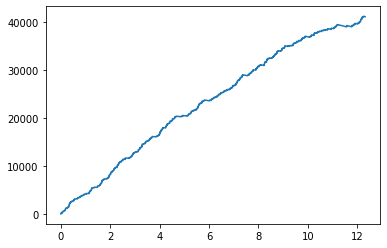

In [49]:
plt.step(t,p)

En este caso, la proteína tiene un comportamiento mucho menos suave (tiene más ruido) que en el caso 3b.A su vez, tarda mucho más tiempo en estabilizarse.